In [1]:
import handcalcs.render


In [5]:
import handcalcs.render


In [147]:
from math import sqrt

def bullet_positions(center_x, center_y, target_x, target_y, radius, max_speed, weapon_speed):
    """
    Gets all bullet positions within a circle
    Uses the equation:
        (x, y) = (x1 + k(x2 - x1), y1 + k(y2 - y1))

        where (x1, y1) is the start point,
              (x2, y2) is the endpoint,
              k is the fraction of the line you want to divide
        
    This is adjusted to use delta time and so the updated equation is:
        (x, y) = (x1 + dt(k(x2 - x1)), y1 + dt(k(y2 - y1)))
        
    :param center_x: X coord at the center of the circle
    :param center_y: Y coord at the center of the circle
    :param target_x: X coord at the target position
    :param target_y: Y coord at the target position
    :param radius: Radius of the cirlce
    :param max_speed: Fastest speed the bullet can travel
    :param weapon_speed: Percentage of the max speed
    :return: (x, y) of new bullet coords
    """
    # Used to get distance and as the circle equation
    euclidean_dist = lambda x, y: (x - center_x) ** 2 + (y - center_y) ** 2
    
    # Gets distance from the center of the cirlce to the target position
    dist = sqrt(euclidean_dist(target_x, target_y))
    
    # Number of divisions on the line to know how far the bullet should travel each frame
    num_of_divs = dist / (max_speed * (weapon_speed / 100))
    
    # Start bullet coords
    bullet_x, bullet_y = center_x, center_y
    
    # Trakcs the current division
    current_div = 1
    
    # Used in game loop to base travel distance on real time instead of frame by frame
    delta_time = 1
    
    # Bullet will keep travelling while it is still in within range
    while euclidean_dist(bullet_x, bullet_y) < radius ** 2:
        
        # Gets change to multiply with delta time
        new_x = center_x + ((current_div / num_of_divs) * (target_x - center_x))
        new_y = center_y + ((current_div / num_of_divs) * (target_y - center_y))
        
        bullet_x += (new_x - bullet_x) * delta_time
        bullet_y += (new_y - bullet_y) * delta_time
        
        current_div += 1

        yield bullet_x, bullet_y

In [183]:
%%render
# Long
a_x = 300
a_y = 300

b_x = 550
b_y = 550

c_x = 300
c_y = 300

d = sqrt((b_x - a_x)**2 + (b_x - a_x)**2)

k = d / (20 * (75 / 100)) #20 -> max speed, 75 -> weapon speed
r = 200 #200 -> weapon dist

cond = (c_x - a_x)**2 + (c_y - a_y) < r**2

t = 1 / k #First position
Delta_time = 1 # No change in correct time between frames

Delta_x = t * (b_x - a_x)
Delta_y = t * (b_y - a_y)

C_x = c_x + (Delta_time * Delta_x)
C_y = c_y + (Delta_time * Delta_y)

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


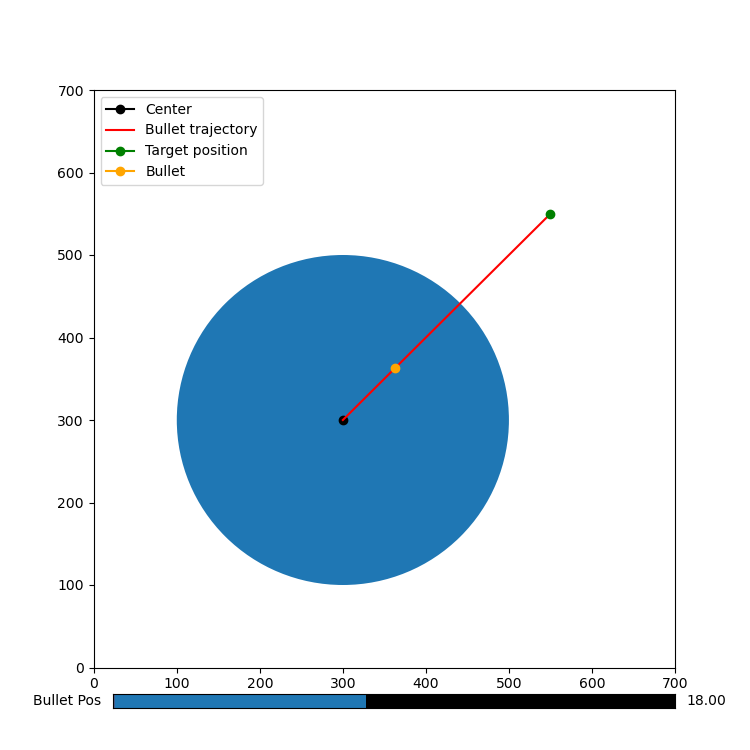

In [181]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

bullet_pos = [(a_x, a_y)] + [i for i in bullet_positions(a_x, a_y, b_x, b_y, r, 20, 25)]

fig = plt.figure(figsize=(7.5, 7.5))
ax = plt.subplot()

circle = plt.Circle((a_x, a_y), 200)
plt.plot(a_x, a_y, marker="o", color="black", label="Center")
plt.plot([a_x, b_x], [a_y, b_y], color="red", label="Bullet trajectory")
plt.plot(b_x, b_y, marker="o", color="green", label="Target position")
bullet_plt, = plt.plot(a_x, a_y, marker="o", color="orange", label="Bullet")

plt.legend(loc="upper left")

ax.set_xlim(0, 700)
ax.set_ylim(0, 700)

ax.add_artist(circle)

slider_ax = fig.add_axes([0.15, 0.04, 0.75, 0.05], facecolor="black")
slider = Slider(slider_ax, "Bullet Pos", 0, len(bullet_pos) - 1, valinit=0, valstep=1)

def sliders_on_change(val):
    bullet_plt.set_xdata(int(bullet_pos[int(val)][0]))
    bullet_plt.set_ydata(int(bullet_pos[int(val)][1]))
    fig.canvas.draw_idle()

slider.on_changed(sliders_on_change) 

plt.gca().set_aspect("equal")
plt.show()